  # Principal component analysis (PCA)

Prepared: Sergey Sabalevskiy, group 18Б.07-пу

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

## Theory

The principal component analysis is a widely used method of reducing dimensionality. The problem of the principal component method can be derived from a linear approach to dimension reduction.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png" alt="drawing" width="400" height="400"/>


### How does it look mathematically?

Any data set is some matrix $X$.

The principal component method consistently finds the following linear combinations of features (components) from $X$:
- each component is orthogonal to all others and normalized: $<w_i, w_j> = 0, \quad ||w_i||=1$,
- each component describes the maximum possible variance of the data (taking into account the previous constraint).

Assumptions within which this approach will work well:
- **linearity of components**: we assume that the data can be analyzed using linear methods,
- **large variances are important**: it is assumed that the directions in the data along which they have the greatest variance are the most important,
- **all components are orthogonal**: this assumption makes it possible to analyze the principal components using linear algebra techniques (for example, the singular value decomposition of the matrix $X$ or the spectral decomposition of the matrix $X^TX$).

We denote the sample data covariance matrix as follows: $\hat{C} \sim Q = X^TX$.

($Q$ differs from $\hat{C}$ by normalization by the number of objects).

The singular value decomposition of the matrix $Q$ looks like this:

$$Q = X^TX = W \Lambda W^T$$

It can be strictly shown that the columns of the matrix $W$ are the principal components of the matrix $X$, i.e. combinations of features satisfying the two conditions specified at the beginning. In this case, the variance of the data along the direction specified by each component is equal to the corresponding value of the diagonal matrix $\Lambda$.

### How, on the basis of this transformation, to reduce the dimension?

We can arrange the components using the variance values of the data along them.

Let's do it: $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$.

Then, if we select the components corresponding to the first $d$ variances from this list, we will get a set of $d$ new features that best describe the variance of the original data set among all other possible linear combinations of the original features of the matrix $X$.
- If $d=D$, then we don't lose any information at all.
- If $d<D$, then we lose information, which, if the above assumptions are true, will be proportional to the sum of the variances of the discarded components.

It turns out that the principal component method allows us to rank the received components by "significance", as well as to start the process of their selection.

## Example

Consider a data set that is sampled from a multidimensional normal distribution with a covariance matrix $C = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$.

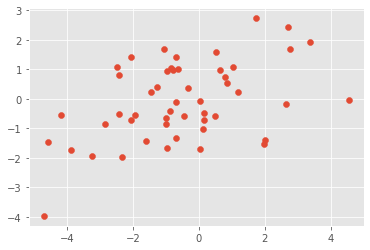

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3, 1], [1, 2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

By diagonalizing the true covariance matrix $C$, we can find a transformation of the original dataset whose components will best describe the variance, taking into account their orthogonality to each other:

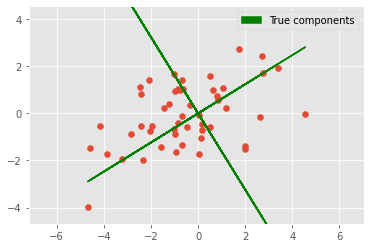

In [3]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:, 0], data[:, 1])
# construct the true components along which the data variance is maximal
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g")
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g")
g_patch = mpatches.Patch(color="g", label="True components")
plt.legend(handles=[g_patch])
plt.axis("equal")
limits = [
    np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])),
    np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1])),
]
plt.xlim(limits[0], limits[1])
plt.ylim(limits[0], limits[1])
plt.draw()


And now let's compare these directions with the directions that the principal component method chooses:

In [4]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:, 0], data[:, 1])
    plt.plot(data[:, 0], -(W_pca[0, 0] / W_pca[0, 1]) * data[:, 0], color="c")
    plt.plot(data[:, 0], -(W_pca[1, 0] / W_pca[1, 1]) * data[:, 0], color="c")
    if legend:
        c_patch = mpatches.Patch(color="c", label="Principal components")
        plt.legend(handles=[c_patch], loc="lower right")
    # сделаем графики красивыми:
    plt.axis("equal")
    limits = [
        np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])) - 0.5,
        np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1])) + 0.5,
    ]
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[0], limits[1])
    plt.draw()


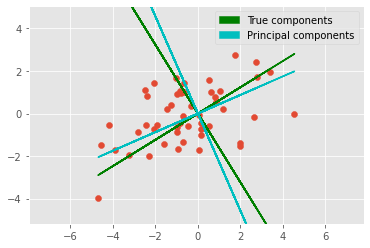

In [5]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:, 0], data[:, 1])
# construct the true components along which the data variance is maximal
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g")
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g")
# construct the components obtained using the PCA method:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()


It can be seen that even with a small amount of data, they differ slightly.

Let's increase the sample size:

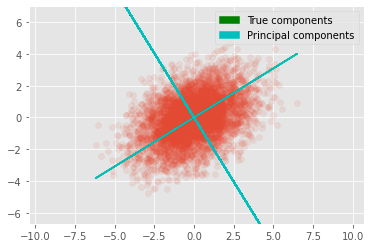

In [6]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:, 0], data_large[:, 1], alpha=0.1)
# construct the true components along which the data variance is maximal
plt.plot(data_large[:, 0], (W_true[0, 0] / W_true[0, 1]) * data_large[:, 0], color="g")
plt.plot(data_large[:, 0], (W_true[1, 0] / W_true[1, 1]) * data_large[:, 0], color="g")
# construct the components obtained using the PCA method:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()


In this case, the main components significantly more accurately approximate the true directions of the data along which the greatest variance is observed.

## Statistical view of the model

The task behind any dimensionality reduction method is to obtain from a set of noisy features $X$ the true values of $Y$, which actually determine the data set (i.e., reducing a dataset with a large number of features to data having the so-called "effective dimension").

In the case of the principal component method, we want to find the directions along which the variance is maximal, taking into account the assumptions described above about the structure of the data and components.

Let's try to get a metric, which should determine how well the data is described by the constructed model for a given number of components. The selection of features in this case boils down to the fact that we choose the number of components at which the metric used (the logarithm of likelihood) is the maximum.

Taking into account the assumptions , the task of the principal component method looks like this:

$$ x = Wy + \mu + \epsilon$$

where:
- $x$ -- observed data
- $W$ -- PC matrix (each column is one component)
- $y$ -- their projection on the principal components
- $\mu$ -- average of observed data
- $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ -- normal noise

Based on the noise distribution, we write out the distribution by $x$:

$$p(x \mid y) = \mathcal{N}(Wx + \mu, \sigma^2I) $$

Introduce an a priori distribution on $y$:

$$p(y) = \mathcal{N}(0, 1)$$

We deduce from this using the Bayes formula the marginal distribution on $p(x)$:

$$p(x) = \mathcal{N}(\mu, \sigma^2I + WW^T)$$

Then the likelihood of the data set under the condition of the model used looks like this ([link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.score_samples)):

$$\mathcal{L} = \sum_{i=1}^N \log p(x_i) = -\frac{N}{2} \Big( d\log(2\pi) + \log |C| + \text{tr}(C^{-1}S) \Big)$$

where:
- $C = \sigma^2I + WW^T$ -- covariance matrix in the marginal model
- $S = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)(x_i - \mu)^T$ -- sample covariance

The value of $\mathcal{L}$ makes sense of the logarithm of the probability of obtaining a data set $X$, provided that it satisfies the assumptions of the principal component method model. The larger it is, the better the model describes the observed data.

## Automatic dimension reduction using the logarithm of likelihood $\mathcal{L}$

Consider a data set of dimension $D$, whose real dimension is much smaller than the observed one (let's call it $d$).

1. For each value of $\hat{d}$ in the interval [1,D], we construct a PCA model with $\hat{d}$ main components.
2. Let's estimate the average logarithm of the likelihood of data for each model on the general dataset using the 3-fold cross-validation method (the final estimate of the logarithm of likelihood is averaged over all folds).
3. Find the model for which it is maximal, that is, the number of components in this model, i.e. the value of $\hat{d}_{opt}$.

Further, **the data has the following properties**: $Y$ with effective dimension $d$ obtained from independent uniform distributions are linearly transformed by a random matrix $W$ into a space of dimension $D$, after which independent normal noise with variance $\sigma$ was added to all the features.

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


def plot_scores(d_scores):
    n_components = np.arange(1, d_scores.size + 1)
    plt.plot(n_components, d_scores, "b", label="PCA scores")
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel("n components")
    plt.ylabel("cv scores")
    plt.legend(loc="lower right")
    plt.show()

In [8]:
data = pd.read_csv("data_1.csv")
D = len(data.columns)

In [9]:
d_scores = []
for n in range(1, D + 1):
    model = PCA(n_components=n)
    scores = cross_val_score(model, data)
    d_scores.append(np.mean(scores))
d_scores = np.array(d_scores)

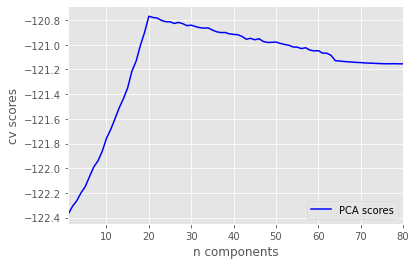

Optimal dimendtionality: 20


In [10]:
plot_scores(d_scores)
print(f"Optimal dimendtionality: {np.argmax(d_scores) + 1}")

## Variation view of the model

We know that each main component corresponds to the data variance described by it (the data variance when projected onto this component). It is numerically equal to the value of the diagonal elements of the matrix $\Lambda$ obtained from the spectral decomposition of the data covariance matrix.

Based on this, we can sort the variance of the data along these components in descending order, and reduce the dimension of the data by discarding the $q$ of the final principal components having the smallest variance.

You can do this in two different ways. For example, if you train a classification or regression model on data with a reduced dimension, then you can start an iterative process: remove components with the smallest variance one by one until the quality of the final model becomes significantly worse.

A more general way of selecting features is that you can look at the differences in variances in the sorted series $\lambda_{(1)} > \lambda_{(2)} > \dots>\lambda_{(D)}$: $\lambda_{(1)}-\lambda_{(2)}, \dots, \lambda_{(D-1)} - \lambda_{(D)}$, and remove those components on which the difference will be greatest.

Let's try to do it.

## Manual reduction of feature dimensionality by analyzing the variance of data along the principal components

Let's consider another data set of dimension $D$, whose real dimension is much smaller than the observed one (let's also call it $d$).

1. Let's build a PCA model with $D$ main components based on these data.
2. Project the data onto the main components.
3. Let's estimate their dispersion along the principal components.
4. Sort the variances in descending order and get their pairwise differences: $\lambda_{(i-1)} - \lambda_{(i)}$.
5. Find the difference with the largest value and get an estimate for the effective dimension of the data $\hat{d}$.
6. Plot the variance graph and make sure that the resulting estimate for $\hat{d}_{opt}$ really makes sense.

In [60]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score


def plot_variances(d_variances):
    n_components = np.arange(1, d_variances.size + 1)
    plt.plot(n_components, d_variances, "b", label="Component variances")
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel("n components")
    plt.ylabel("variance")
    plt.legend(loc="upper right")
    plt.show()

In [61]:
data = pd.read_csv("data_1.csv")
D = len(data.columns)

In [62]:
model = PCA(n_components=D)
data_pca = model.fit_transform(data)

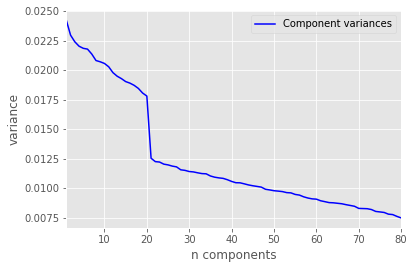

In [63]:
d_variances = model.explained_variance_ratio_
plot_variances(d_variances)

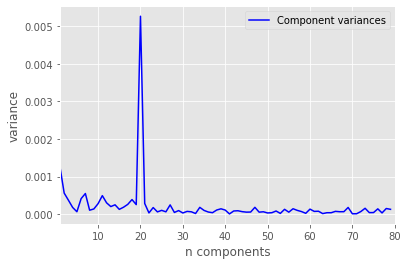

Оптимальная размерность: 20


In [67]:
var_diff = pd.Series(d_variances).sort_values(ascending=False).diff(-1)
plot_variances(var_diff)
print(f"Optimal dimendtionality: {np.argmax(var_diff) + 1}")

## Interpretation of the PCA

As the principal components, we get linear combinations of the initial features, so the question of their interpretation arises reasonably.

There are several approaches to this, consider two:
- calculate the relationship of the principal components with the initial features
- calculate the contributions of each particular observation to the principal components

The first method is suitable in the case when all the objects from the data set do not carry any semantic information for us, which is no longer imprinted in the set of features.

The second method is suitable for the case when the data has a more complex structure. For example, faces for a person carry a greater semantic meaning than the vector of pixel values that PCA analyzes.

## Analysis of the main disadvantages of the principal component method

The problems discussed above are model problems because the data for them were generated in accordance with the assumptions of the principal component method. In practice, these assumptions, of course, are not always fulfilled.

Let's look at the typical errors of PCA that should be kept in mind before applying it.

### The directions with the maximum variance in the data are non-orthogonal

Consider the case of a sample that is generated from two elongated normal distributions:

In [28]:
C1 = np.array([[10, 0], [0, 0.5]])
phi = np.pi / 3
C2 = C1 @ np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
print(C1)
print(C2)

[[10.   0. ]
 [ 0.   0.5]]
[[ 5.          8.66025404]
 [-0.4330127   0.25      ]]


In [29]:
data = np.vstack(
    [
        np.random.multivariate_normal(mu, C1, size=50),
        np.random.multivariate_normal(mu, C2, size=50),
    ]
)

# train the pca model
model = PCA(n_components=2)
model.fit(data)

<ipython-input-29-0eaf27160c8e>:4: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mu, C2, size=50),


PCA(n_components=2)

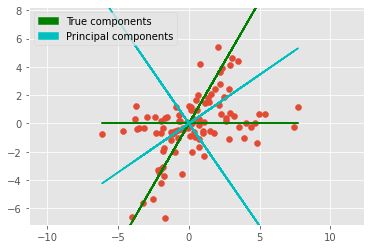

In [30]:
plt.scatter(data[:, 0], data[:, 1])
# build the true components we are interested in
plt.plot(data[:, 0], np.zeros(data[:, 0].size), color="g")
plt.plot(data[:, 0], 3 ** 0.5 * data[:, 0], color="g")

plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In this case, PCA does not work well, since the components we are interested in in the data are correlated with each other (or non-orthogonal). More complex methods are required to search for such transformations.

Perhaps **Factor analysis methods** will work better here.

### The interesting direction in the data does not coincide with the direction of maximum variance

In [31]:
C = np.array([[0.5, 0], [0, 10]])
mu1 = np.array([-2, 0])
mu2 = np.array([2, 0])

data = np.vstack(
    [
        np.random.multivariate_normal(mu1, C, size=50),
        np.random.multivariate_normal(mu2, C, size=50),
    ]
)

# train the pca model and build the main components
model = PCA(n_components=2)
model.fit(data)

PCA(n_components=2)

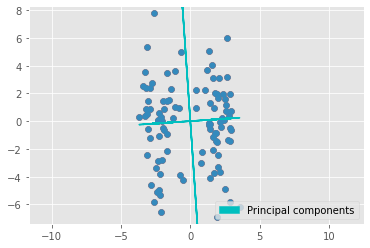

In [32]:
plt.scatter(data[:, 0], data[:, 1])
plot_principal_components(data, model)
plt.draw()

Obviously, in this case, the principal component method will consider the vertical component more significant for describing the dataset than the horizontal one.

But, for example, in the case when the data from the left and right cluster belong to different classes, for their linear separability, the vertical component is noise. Despite this, her principal component method never recognizes noise, and it is likely that the selection of features with its help will throw out components that are significant for the task you are solving from your data simply because the values along them have low variance.

Some other methods of reducing the dimension of data can cope with such situations, for example, the Independent Component Analysis (ICA) method.

![image](https://upload.wikimedia.org/wikipedia/commons/b/bb/SOMsPCA.PNG)

One-dimensional SOM versus principal component analysis (PCA) for data approximation. SOM is a red broken line with squares, 20 nodes. The first principal component is presented by a blue line. Data points are the small grey circles. For PCA, the fraction of variance unexplained in this example is 23.23%, for SOM it is 6.86%.

## PCA Limitations

**Model performance**: PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.

**Classification accuracy**: Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.

**Outliers**: PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.

**Interpretability**: Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.

## Conclusion and Extensions

PCA is a handy addition to the data scientist toolkit and will improve model performance in most scenarios. 

There are some extensions to mitigate specific limitations of PCA in the Scikit-Learn library. These include RandomizedPCA, which is suitable for quickly approximate the first few principal components in very high-dimensional data, and SparsePCA which introduces a regularization tuning parameter for increased sparsity.


 ## Links

 1. [Clustergram Paper](https://journals.sagepub.com/doi/10.1177/1536867X0200200405)
 1. [Clustergram docs for Python](https://pypi.org/project/clustergram/)
 1. [EigenGame: PCA as a Nash Equilibrium](https://paperswithcode.com/paper/eigengame-pca-as-a-nash-equilibrium)
 1. [EigenGAN: Layer-Wise Eigen-Learning for GANs](https://paperswithcode.com/paper/eigengan-layer-wise-eigen-learning-for-gans)
 1. [t-SNE](https://habr.com/ru/post/267041/)
 1. [SOM](https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117)
 1. [Difference between PCA VS t-SNE](https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/)
 1. [PCA vs LDA vs T-SNE — Let’s Understand the difference](https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0)
 1. [PCA vs T-SNE on standart datasets](https://www.thekerneltrip.com/statistics/tsne-vs-pca)
 1. [scikit-learn. Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)